<h1 align="center"> Visualizing Decision Trees with Python (Scikit-learn, Graphviz, Matplotlib) </h1>

## How to Fit a Decision Tree Model using Scikit-Learn

In order to visualize decision trees, we need first need to fit a decision tree model using scikit-learn. If this section is not clear, I encourage you to read my [Understanding Decision Trees for Classification (Python) tutorial](https://towardsdatascience.com/understanding-decision-trees-for-classification-python-9663d683c952) as I go into a lot of detail on how decision trees work and how to use them.

### Import Libraries

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree

### Load the Dataset
The Iris dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below loads the iris dataset.

In [36]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.to_csv('iris.csv') # incase you want to see the dataset

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Splitting Data into Training and Test Sets

![images](trainTestSplit.png)
The colors in the image indicate which variable (X_train, X_test, Y_train, Y_test) the data from the dataframe df went to for a particular train test split. 

In [37]:
X = df[data.feature_names]
y = df['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0)

### Scikit-learn 4-Step Modeling Pattern

<b>Step 1:</b> Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [38]:
# This was already imported earlier in the notebook so commenting out
#from sklearn.tree import DecisionTreeClassifier

<b>Step 2:</b> Make an instance of the Model

In [60]:
# max_depth: The length of the longest path from a root node to a leaf node will not exceed this value.
# This is the most commonly tuned hyperparameter for tree-based method. Here I will uses default value
clf = DecisionTreeClassifier(max_depth = 2, # Try to change this to 3 and 4 and accuracy would go , but may be overfiting. 
                             random_state = 0)

<b>Step 3:</b> Training the model on the data, storing the information learned from the data

Model is learning the relationship between x (features: sepal width, sepal height etc) and y (labels-which species of iris)

In [61]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [62]:
# Lets print all hyperparam
print(clf.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 0, 'splitter': 'best'}


<b>Step 4:</b> Predict the labels of new data (new flowers)

Uses the information the model learned during the model training process

Uses the information the model learned during the model training process

In [63]:
# Returns a NumPy Array
# Predict for One Observation (image)
idx = 0
Y_pred = clf.predict(X_test.iloc[idx].values.reshape(1, -1))

print(f"Predicted value: {Y_pred}")
print(f"Actual value: {Y_test.iloc[idx]}")


Predicted value: [2]
Actual value: 2


c:\Users\hi\Desktop\projects\python_projects\tutorial\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Predict for Multiple Observations (images) at Once

In [64]:
Y_pred = clf.predict(X_test[0:10])

print(f"Predicted value: {Y_pred}")
print(f"Actual value   : {Y_test.iloc[0:10].values}")


Predicted value: [2 1 0 2 0 2 0 1 1 1]
Actual value   : [2 1 0 2 0 2 0 1 1 1]


### Measuring Model Performance

 While there are other ways of measuring model performance, we are going to keep this simple and use accuracy as our metric. 
To do this are going to see how the model performs on new data (test set)

Accuracy is defined as:
(fraction of correct predictions): correct predictions / total number of data points

In [65]:
score = clf.score(X_test, Y_test)
print(score)

0.8947368421052632


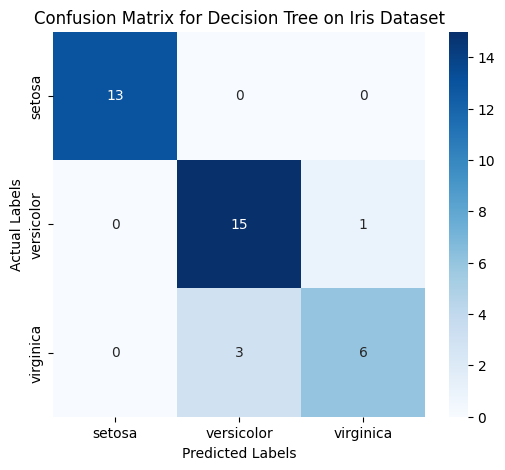

Accuracy: 89.47%


In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

Y_pred = clf.predict(X_test)

# 5️⃣ Compute the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# 6️⃣ Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Decision Tree on Iris Dataset")
plt.show()

# Print accuracy
print(f"Accuracy: {accuracy_score(Y_test, Y_pred) * 100:.2f}%")

## How to Visualize Decision Trees using Matplotlib

Decision Trees can now be plotted with matplotlib using scikit-learn's `tree.plot_tree` . 

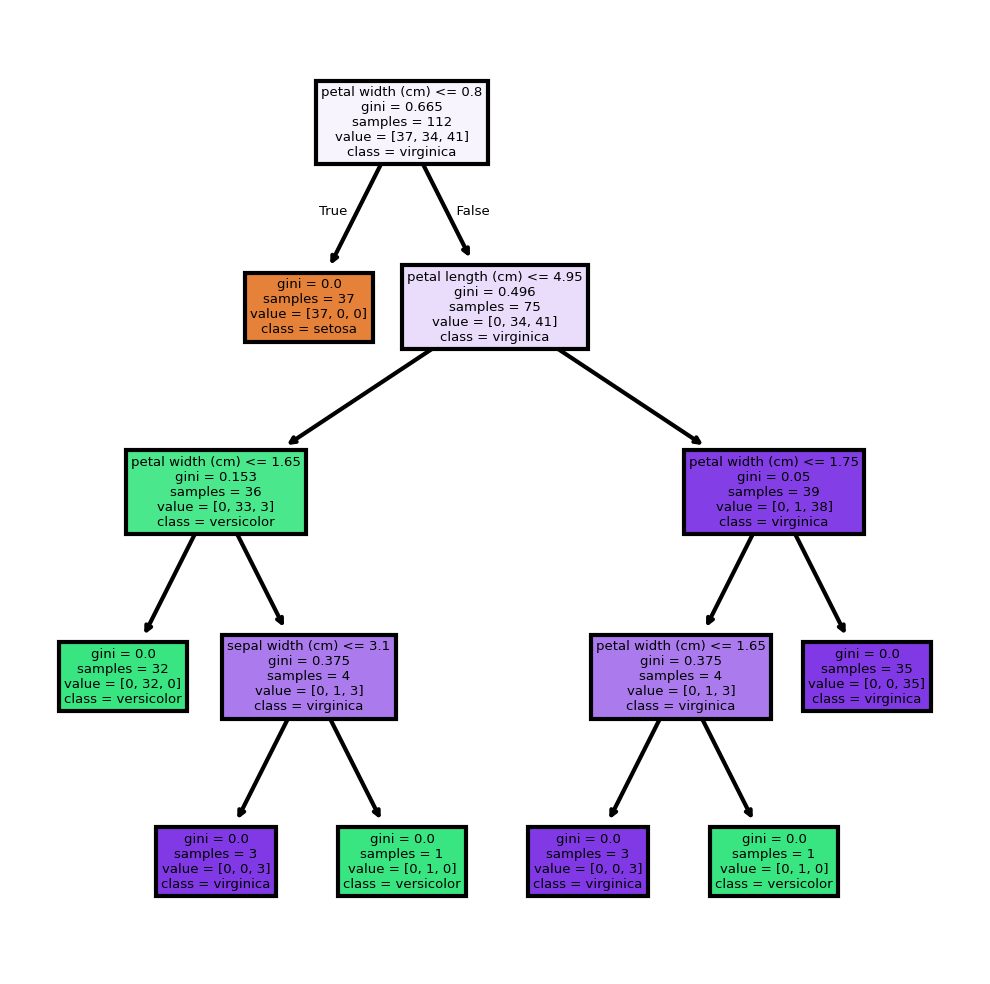

In [46]:
# Putting the feature names and class names into variables
fn = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn = ['setosa', 'versicolor', 'virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
# fig.savefig('plottreefncn.png') # optional if u want to save 

### Hyperparameter Tuning
The default tree is quite complex, and we need to simplify it by tuning the hyperparameters.

First, let's understand the parameters in a decision tree. You can read this in the documentation using help(DecisionTreeClassifier).

- criterion (Gini/IG or entropy): It defines the function to measure the quality of a split. Sklearn supports “gini” criteria for Gini Index & “entropy” for Information Gain. By default, it takes the value “gini”.
- splitter: It defines the strategy to choose the split at each node. Supports “best” value to choose the best split & “random” to choose the best random split. By default, it takes “best” value.
- max_features: It defines the no. of features to consider when looking for the best split. We can input integer, float, string & None value.
- max_depth: The max_depth parameter denotes maximum depth of the tree. It can take any integer value or None. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. By default, it takes “None” value.
- min_samples_split: This tells above the minimum no. of samples reqd. to split an internal node. If an integer value is taken then consider min_samples_split as the minimum no. If float, then it shows percentage. By default, it takes “2” value.
- min_samples_leaf: The minimum number of samples required to be at a leaf node. If an integer value is taken then consider - -min_samples_leaf as the minimum no. If float, then it shows percentage. By default, it takes “1” value.
- max_leaf_nodes: It defines the maximum number of possible leaf nodes. If None then it takes an unlimited number of leaf nodes. By default, it takes “None” value.
- min_impurity_split: It defines the threshold for early stopping tree growth. A node will split if its impurity is above the threshold otherwise it is a leaf.

## Grid Search to Find Optimal Hyperparameters
#### We can now use GridSearchCV to find multiple optimal hyperparameters together. Note that this time, we'll also specify the criterion (gini/entropy or IG).

In [48]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Create the parameter grid 
param_grid = {
    'max_depth': range(1, 8, 1),
    'min_samples_leaf': range(1, 10, 2),
    'min_samples_split': range(2, 10, 2),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
iristree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = iristree,
                           param_grid = param_grid, 
                           cv = n_folds,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 8),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)},
             verbose=1)

In [49]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003210,0.000977,0.002389,0.000465,entropy,1,1,2,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.695652,0.695652,0.681818,0.681818,0.727273,0.696443,0.016610,241
1,0.004603,0.001357,0.002603,0.000796,entropy,1,1,4,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.695652,0.695652,0.681818,0.681818,0.727273,0.696443,0.016610,241
2,0.002603,0.000788,0.002392,0.000802,entropy,1,1,6,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.695652,0.695652,0.681818,0.681818,0.727273,0.696443,0.016610,241
3,0.002199,0.000400,0.002397,0.000793,entropy,1,1,8,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.695652,0.695652,0.681818,0.681818,0.727273,0.696443,0.016610,241
4,0.002113,0.000245,0.001799,0.000399,entropy,1,3,2,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.695652,0.695652,0.681818,0.681818,0.727273,0.696443,0.016610,241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.002394,0.000482,0.001409,0.000488,gini,7,7,8,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.956522,0.913043,1.000000,0.909091,0.954545,0.946640,0.033305,81
276,0.002001,0.000013,0.001996,0.000011,gini,7,9,2,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.956522,0.913043,1.000000,0.909091,0.954545,0.946640,0.033305,81
277,0.002196,0.000402,0.001203,0.000398,gini,7,9,4,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.956522,0.913043,1.000000,0.909091,0.954545,0.946640,0.033305,81
278,0.001994,0.000007,0.001805,0.000402,gini,7,9,6,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.956522,0.913043,1.000000,0.909091,0.954545,0.946640,0.033305,81


In [50]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9731225296442687
DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=4)


### Running the model with best parameters obtained from grid search

In [54]:
# model with optimal hyperparameters
clf1 = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=4, 
                                  min_samples_leaf=3,
                                  min_samples_split=2)
clf1.fit(X_train, Y_train)

# accuracy score
clf1.score(X_test,Y_test)

0.9736842105263158

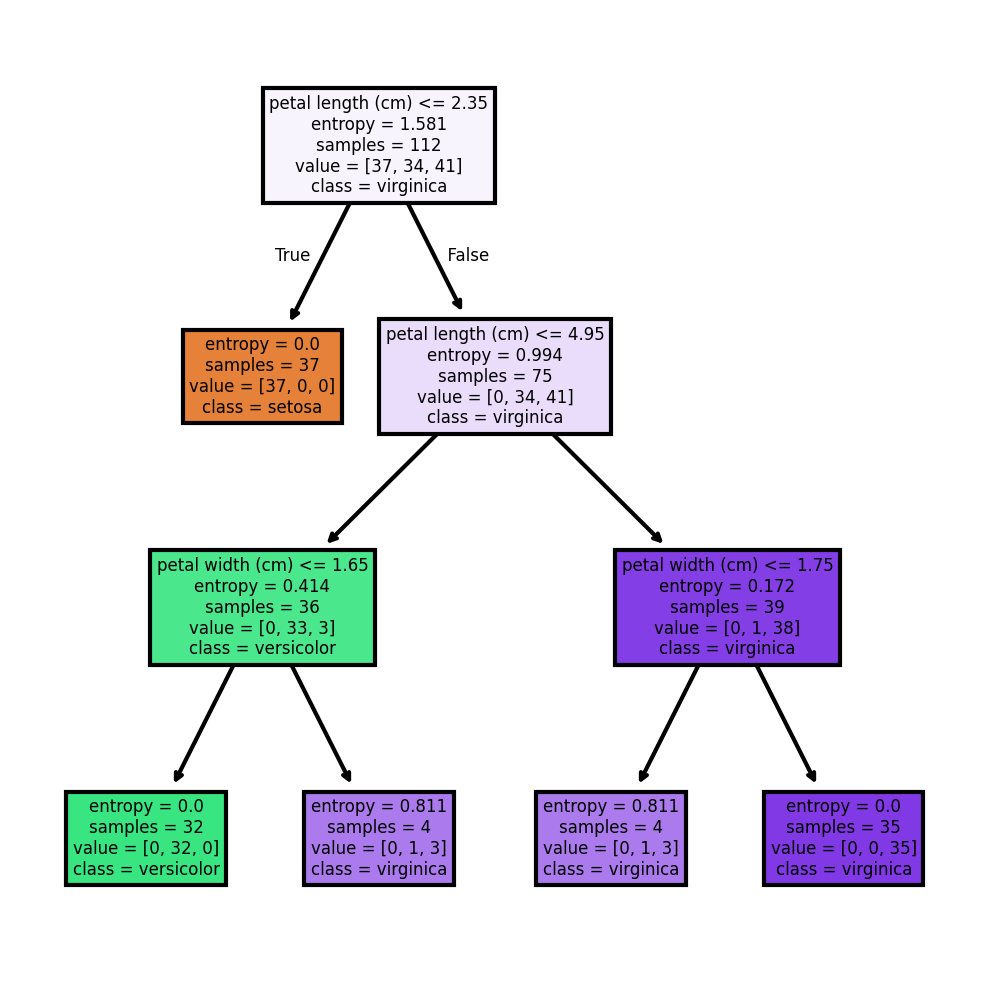

In [55]:
# Putting the feature names and class names into variables
fn = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn = ['setosa', 'versicolor', 'virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(clf1,
               feature_names = fn, 
               class_names=cn,
               filled = True);
# fig.savefig('plottreefncn.png') # optional if u want to save 

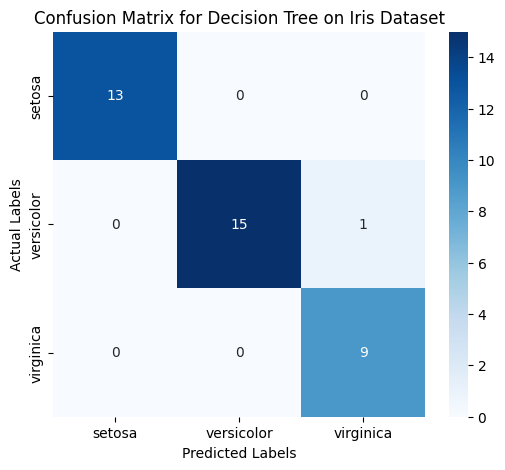

Accuracy: 97.37%


In [67]:
Y_pred = clf1.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Decision Tree on Iris Dataset")
plt.show()

# Print accuracy
print(f"Accuracy: {accuracy_score(Y_test, Y_pred) * 100:.2f}%")

### Better than above. 